In [1]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install 'qiskit[visualization]'

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


# Step 1 : Import Packages
QuantumCircuit: can be thought as the instructions of the quantum system. It holds all your quantum operations.
AerSimulator: is the Aer high performance circuit simulator.
plot_histogram: creates histograms.

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Step 2 : Initialize Variables
Here, you are initializing with 2 qubits in the zero state; with 2 classical bits set to zero; and circuit is the quantum circuit.
Syntax:

QuantumCircuit(int, int)

In [5]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Step 3 : Add Gates
You can add gates (operations) to manipulate the registers of your circuit.

The gates are added to the circuit one-by-one to form the Bell state

The code above applies the following gates:
* QuantumCircuit.h(0): A Hadamard gate H  on qubit 0, which puts it into a superposition state.
* QuantumCircuit.cx(0, 1): A controlled-Not operation (CNOT) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.
* QuantumCircuit.measure([0,1], [0,1]): if you pass the entire quantum and classical registers to measure, the ith qubit’s measurement result will be stored in the ith classical bit.

In [6]:
# Add a H gate on qubit 0
circuit.h(0)

In [7]:
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

In [8]:
# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Step 4 : Visualize the Circuit
You can use qiskit.circuit.QuantumCircuit.draw() to view the circuit that you have designed in the various forms used in many textbooks and research articles.

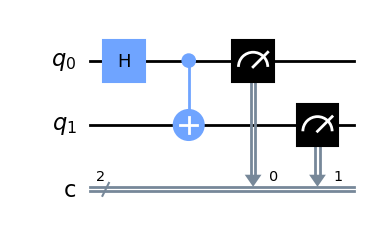

In [9]:
# Draw the circuit
circuit.draw("mpl")

In this circuit, the qubits are ordered with qubit zero at the top and qubit one at the bottom. The circuit is read left-to-right, meaning that gates which are applied earlier in the circuit show up farther to the left.

The default backend for **QuantumCircuit.draw()** or **qiskit.visualization.circuit_drawer()** is the text backend. However, depending on your local environment you may want to change these defaults to something better suited for your use case. This is done with the user config file. By default the user config file should be located in **~/.qiskit/settings.conf** and is a **.ini** file.

# Step 5 : Simulate the Experiment
Qiskit Aer is a high performance simulator framework for quantum circuits. It provides several backends to achieve different simulation goals.

If you have issues installing Aer, you can alternatively use the Basic Aer provider by replacing Aer with BasicAer. Basic Aer is included in Qiskit.

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy

To simulate this circuit, you will use the AerSimulator. Each run of this circuit will yield either the bit string 00 or 11.

In [11]:
# Use Aer's AerSimulator
simulator = AerSimulator()

In [12]:
# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

In [13]:
# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

In [14]:
# Grab results from the job
result = job.result()

In [15]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)


Total count for 00 and 11 are: {'11': 486, '00': 514}


As expected, the output bit string is 00 approximately 50 percent of the time. The number of times the circuit is run can be specified via the shots argument of the execute method. The number of shots of the simulation was set to be 1000 (the default is 1024).

Once you have a result object, you can access the counts via the method get_counts(circuit). This gives you the aggregate outcomes of the experiment you ran.

# Step 6 : Visualize the Results
Qiskit provides many visualizations (https://qiskit.org/documentation/apidoc/visualization.html),
including the function plot_histogram, to view your results.

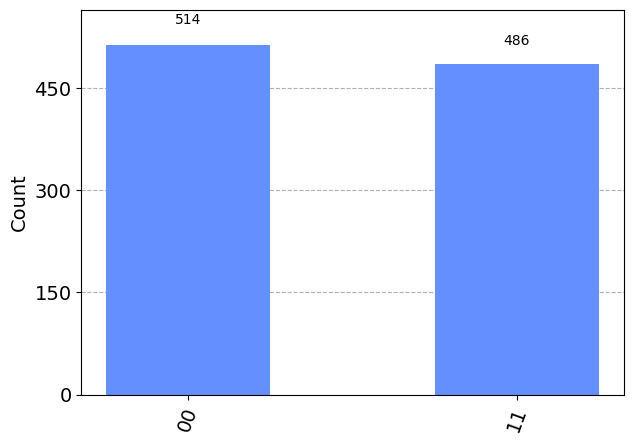

In [16]:
# Plot a histogram
plot_histogram(counts)